In [7]:
import sqlite3
import pandas as pd
import numpy as np

conn = sqlite3.connect('./exercise01.sqlite')

In [8]:
records = pd.read_sql_query("""SELECT r.*, w.name AS workclass, e.name AS education_level, 
                        m.name AS marital_status, o.name AS occupation, ra.name AS race,
                        s.name AS sex, c.name AS country                   
    FROM records AS r
    INNER JOIN workclasses AS w ON r.workclass_id=w.id
    INNER JOIN education_levels AS e ON r.education_level_id=e.id
    INNER JOIN marital_statuses AS m ON r.marital_status_id=m.id
    INNER JOIN occupations AS o ON r.occupation_id=o.id
    INNER JOIN races AS ra ON r.race_id=ra.id
    INNER JOIN sexes AS s ON r.sex_id=s.id
    INNER JOIN countries AS c ON r.country_id=c.id
    """, conn)

conn.close()
records.head()

,id,age,workclass_id,education_level_id,education_num,marital_status_id,occupation_id,relationship_id,race_id,sex_id,...,hours_week,country_id,over_50k,workclass,education_level,marital_status,occupation,race,sex,country
0,1,39,8,10,13,5,2,2,5,2,...,40,40,0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,United-States
1,2,50,7,10,13,3,5,1,5,2,...,13,40,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,3,38,5,12,9,1,7,2,5,2,...,40,40,0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States
3,4,53,5,2,7,3,7,1,3,2,...,40,40,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,5,28,5,10,13,3,11,6,3,1,...,40,6,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba


In [9]:
records.describe(include='all')

,id,age,workclass_id,education_level_id,education_num,marital_status_id,occupation_id,relationship_id,race_id,sex_id,...,hours_week,country_id,over_50k,workclass,education_level,marital_status,occupation,race,sex,country
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842,48842,48842,48842,48842,48842,48842
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9,16,7,15,5,2,42
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,White,Male,United-States
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33906,15784,22379,6172,41762,32650,43832
mean,24421.500000,38.643585,4.870439,11.288420,10.078089,3.618750,7.577700,2.443287,4.668052,1.668482,...,40.422382,37.749355,0.239282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14099.615261,13.710510,1.464234,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,...,12.391444,7.775343,0.426649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12211.250000,28.000000,5.000000,10.000000,9.000000,3.000000,4.000000,1.000000,5.000000,1.000000,...,40.000000,40.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,24421.500000,37.000000,5.000000,12.000000,10.000000,3.000000,8.000000,2.000000,5.000000,2.000000,...,40.000000,40.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36631.750000,48.000000,5.000000,13.000000,12.000000,5.000000,11.000000,4.000000,5.000000,2.000000,...,45.000000,40.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


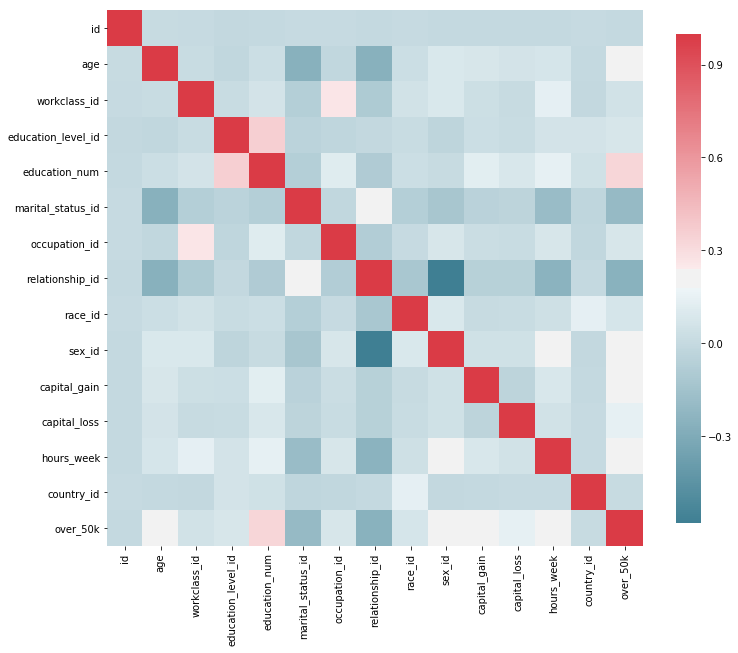

In [10]:
# look at correlation structure
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

corr = records.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax
)

In [11]:
records.dtypes

id                     int64
age                    int64
workclass_id           int64
education_level_id     int64
education_num          int64
marital_status_id      int64
occupation_id          int64
relationship_id        int64
race_id                int64
sex_id                 int64
capital_gain           int64
capital_loss           int64
hours_week             int64
country_id             int64
over_50k               int64
workclass             object
education_level       object
marital_status        object
occupation            object
race                  object
sex                   object
country               object
dtype: object

In [12]:
records_num = records.select_dtypes(include=['float64', 'int64'])
records_cat = records.select_dtypes(include=['object'])
records_other = records.select_dtypes(exclude=['object', 'float64', 'int64'])
records_other.shape

(48842, 0)

In [27]:
records.groupby(['workclass']).mean()['over_50k']

workclass
?                   0.094677
Federal-gov         0.391760
Local-gov           0.295599
Never-worked        0.000000
Private             0.217867
Self-emp-inc        0.553392
Self-emp-not-inc    0.278871
State-gov           0.267542
Without-pay         0.095238
Name: over_50k, dtype: float64

In [28]:
# let's dummy code our categorical variables
dummy = pd.DataFrame()
for i, var_name in enumerate(records_cat):
    newvar = pd.get_dummies(records_cat[var_name], prefix=var_name)
    dummy = pd.concat([dummy,newvar], axis=1)

In [31]:
data = pd.concat([records_num, dummy], axis=1)
data.shape

(48842, 111)

In [39]:
from sklearn.model_selection import train_test_split

test = data['over_50k']
train = data.drop(['over_50k'], axis=1)

train_X, test_X, train_y, test_y = train_test_split(train, test, train_size=0.7)

/Users/zacharyabzug/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
train_y.shape

(34189,)

In [44]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(train_X, train_y)
train_acc = mdl.score(train_X, train_y)
test_acc = mdl.score(test_X, test_y)

print(train_acc, test_acc)


0.8280148585802451 0.829045246707159


In [62]:
corr2 = data.corr()
corrslice = corr2['over_50k'].drop(['over_50k'])

coefs = np.concatenate(mdl.coef_)

Text(0,0.5,'Regression Coefficient')

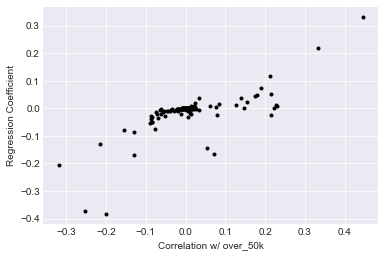

In [73]:
sns.set_style('darkgrid')
plt.plot(corrslice, coefs, 'k.')
plt.xlabel('Correlation w/ over_50k')
plt.ylabel('Regression Coefficient')